Not yet!!!!!!!!!!!!!!!!!!!!


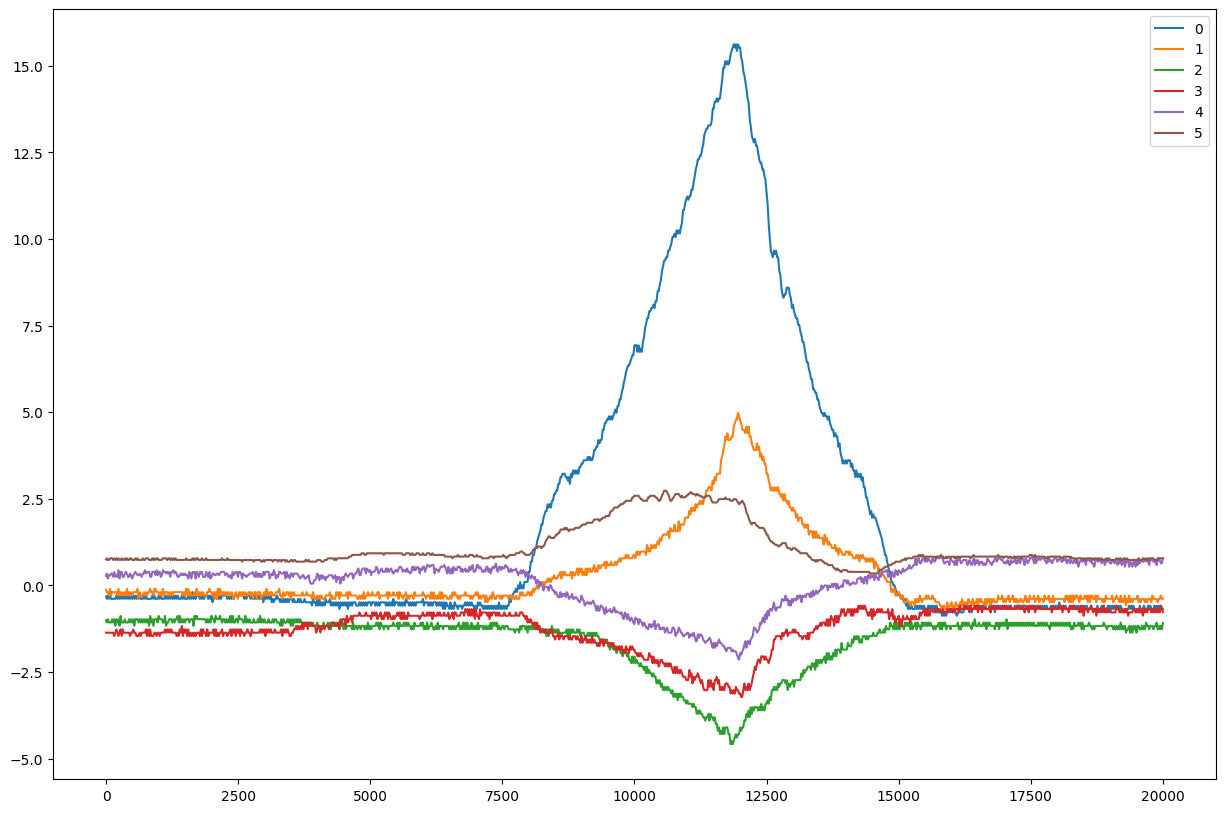

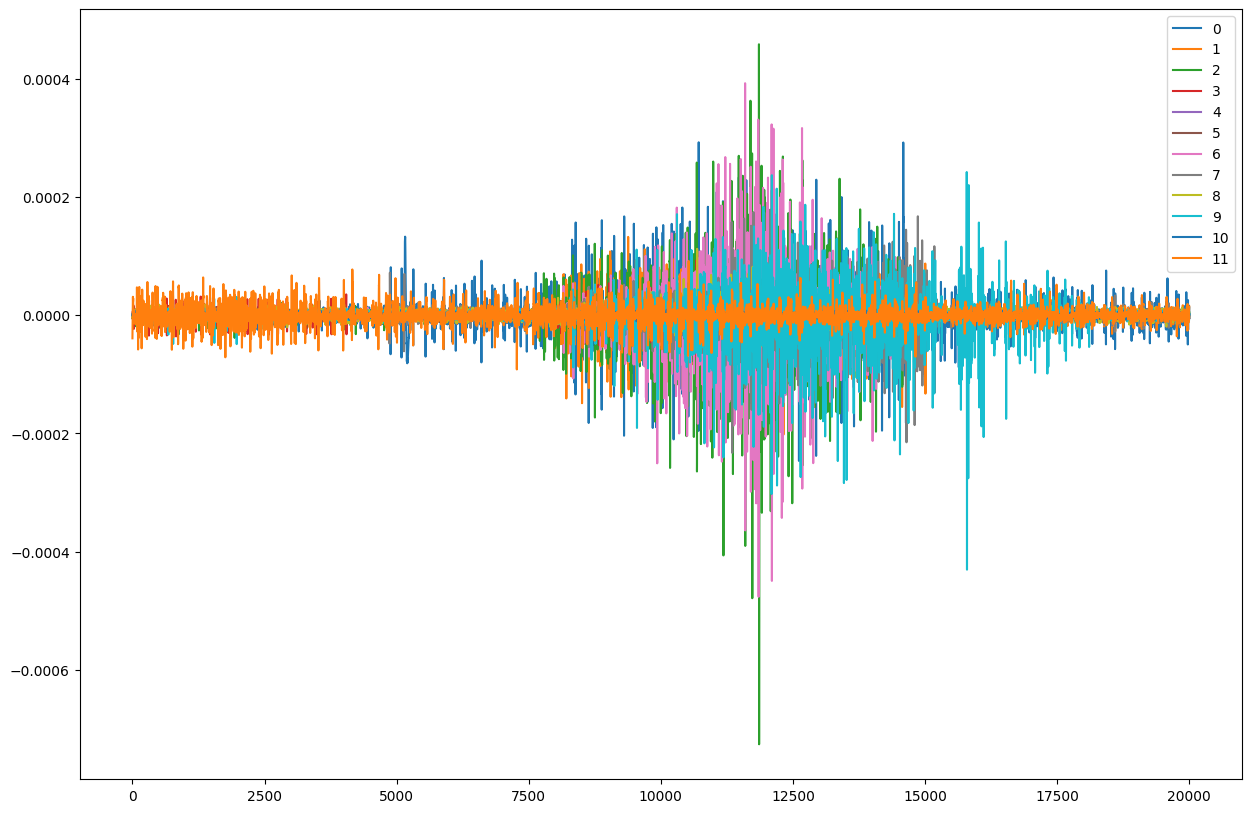

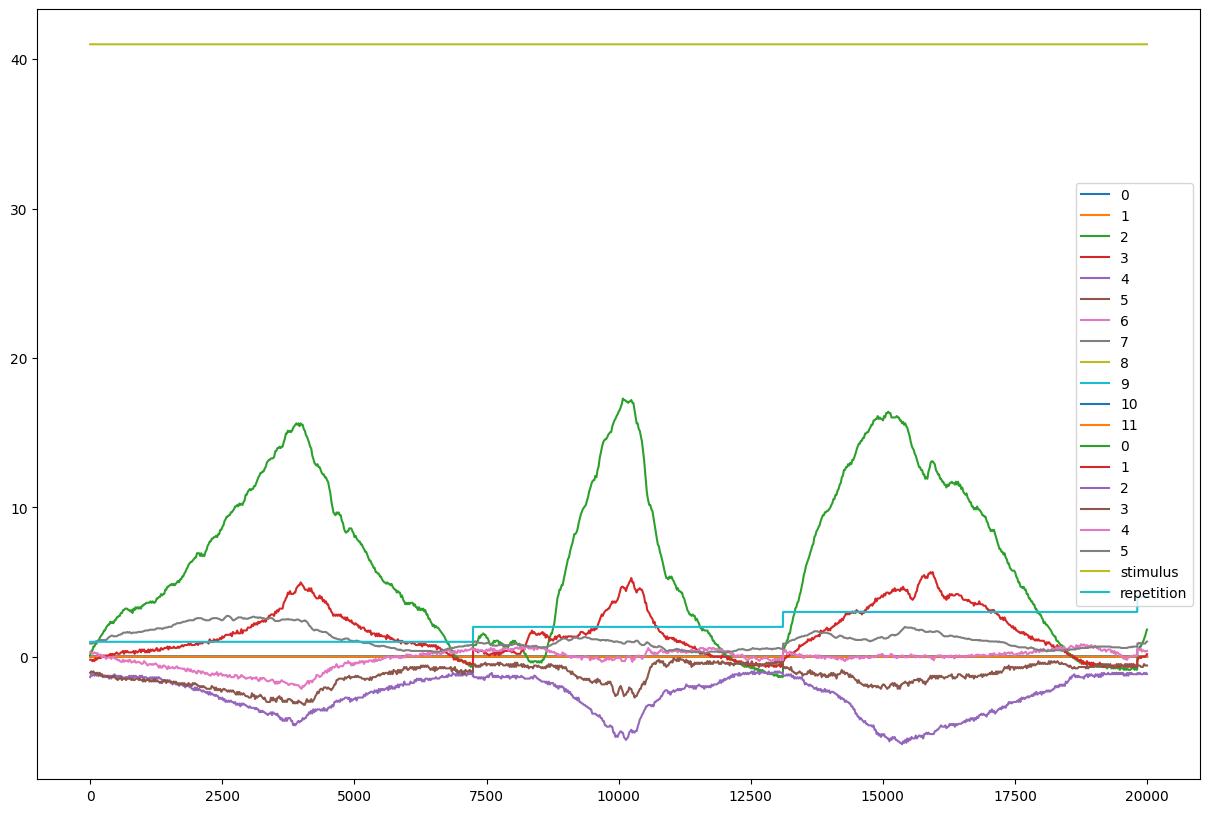

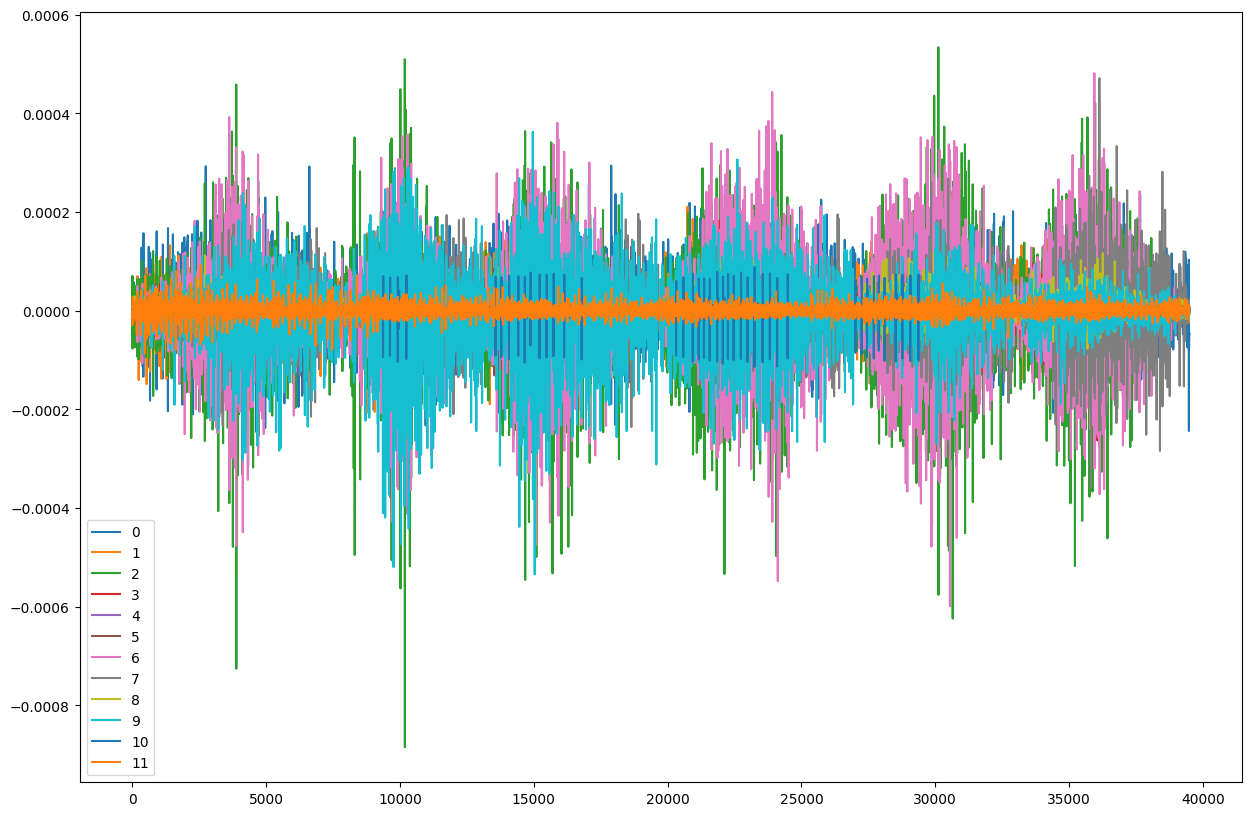

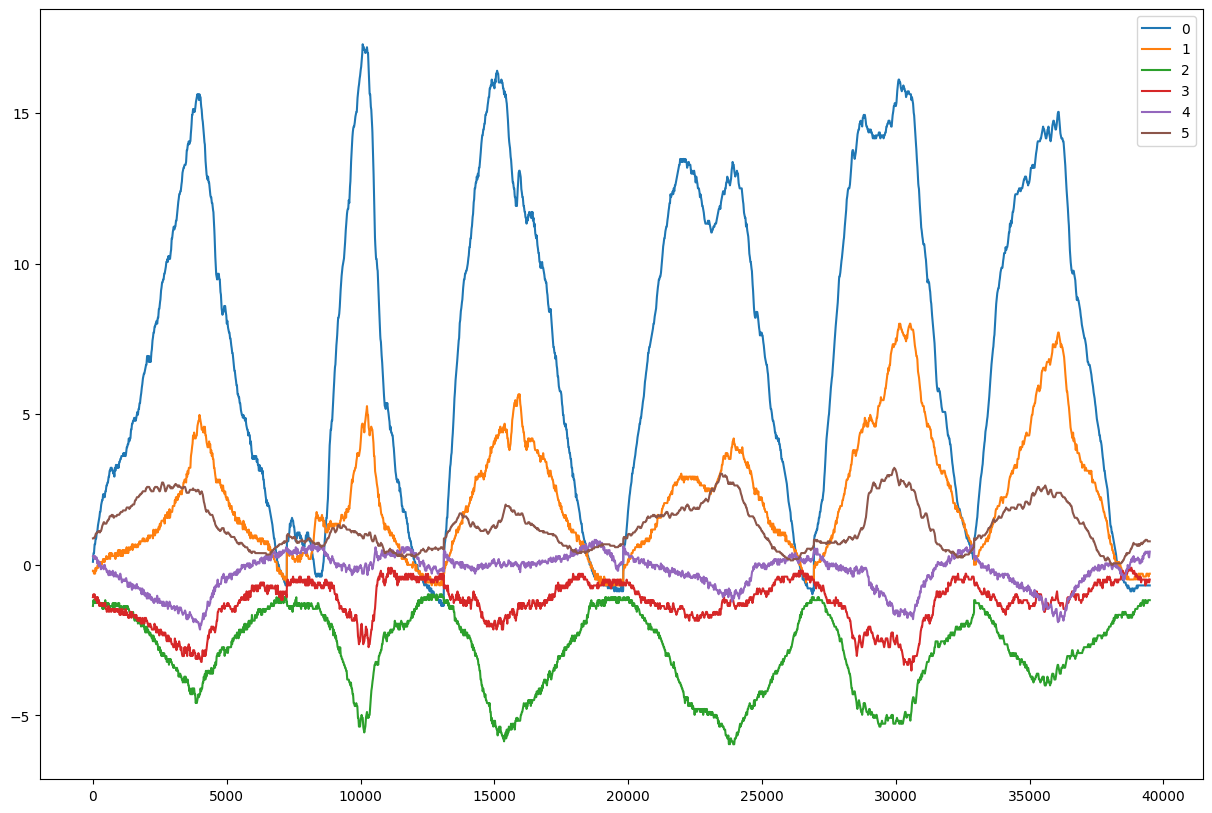

In [1]:
from DataProcess_emg import *
from FCNN import *
import torch


%matplotlib inline
data=Data(12,6)
data.get_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.force_signal[:20000].plot(figsize = (15,10))
data.emg_signal[:20000].plot(figsize = (15,10))
data.crop_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.emg_signal[:].plot(figsize = (15,10))
data.force_signal[:].plot(figsize = (15,10))
data.normalise()
# data.emg_signal[:100000].plot(figsize = (15,10))
data.filter_data(f=20, butterworth_order=4, btype='lowpass')
# data.emg_signal[:100000].plot(figsize = (15,10))
data.rectify_data()
# data.emg_signal[:1000].plot(figsize = (15,10))
x,y = data.windowing_data(200, 100)

In [2]:
from Feature import *

feature=feature(x)
feature.time_features_estimation(x, 200, 100, data.emg_raw)
print(feature.time_features_matrix.shape)

(854, 8)
(854, 8)


In [3]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# model = MyModel(data.emg_channel, 200, data.force_channel)

cuda


(854, 1)
torch.Size([854, 8])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
t

AttributeError: 'Tensor' object has no attribute 'plot'

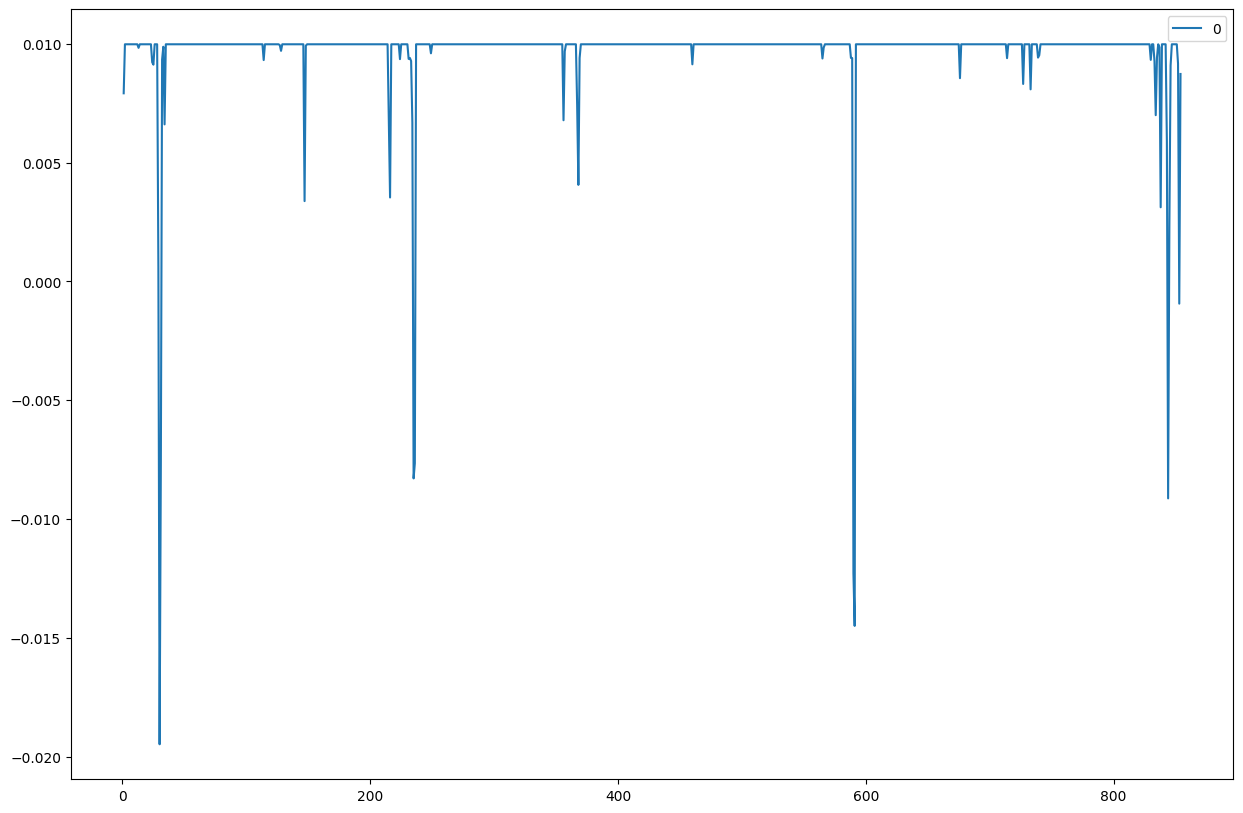

In [4]:
from Result import *


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = MyModel(8, 1)
model.to(device)
model.load_state_dict(torch.load('model_31-13:34.pth'))
x = feature.time_features_matrix.astype(np.float32)
x = torch.tensor(x).to(device)
y_c1 = y[:,0,None].astype(np.float32)
print(y_c1.shape)
y_c1 = torch.tensor(y_c1).to(device)
res = result(model, x, y_c1)


res[:].plot(figsize=(15,10))
y_c1[:].plot(figsize=(15,10))